<table>
    <tr>
        <th><img src="img/rqc.png" href="http://www.rqc.ru/" width="150px"></th>
        <th colspan="3" align=left style="font-weight:normal">
            <p>• Anton Karazeev: [a.karazeev@rqc.ru](mailto:a.karazeev@rqc.ru) or [t.me/akarazeev](t.me/akarazeev)</p>
            <p>• Based on ...</p>
        </th>
    </tr>
</table>

# Rigetti Forest

## Введение

In [41]:
from pyquil.quil import Program
from pyquil.gates import H, CNOT
from pyquil.api import QVMConnection

# Создаём объект для квантовой программы.
p = Program()

# "Мутирование" квантовой программы под действием
# "инструкции" `H(0)` - гейт Адамара, который
# действует на нулевой кубит.
p.inst(H(0))
# Добавление CNOT гейта, который использует нулевой
# кубит как управляющий, а первый кубит как таргет.
p.inst(CNOT(0, 1))

# Объект "квантовой виртуальной машины" - создаёт
# соединение с облачным бэкэндом.
qvm = QVMConnection()

# Запускаем квантовую программу `p` на бэкэнде.
result = qvm.wavefunction(p)

# Посмотреть на результаты программы в виде "{'00': p1,
# '01': p2, ...}", где p1, p2, ... - вероятности
# соответствующих исходов.
print(result.get_outcome_probs())

{'00': 0.49999999999999989, '01': 0.0, '10': 0.0, '11': 0.49999999999999989}


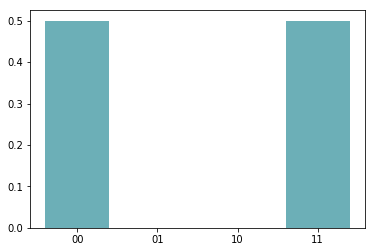

In [68]:
# Построим гистограмму исходов.
result.plot()

In [69]:
# Ещё один способ представить состояние.
result.pretty_print()

'(0.71+0j)|00> + (0.71+0j)|11>'

## Гейты

In [52]:
import numpy as np
from pyquil.gates import I

quantum_simulator = QVMConnection()

# Создаём квантовую программу, которая использует
# один кубит и применяет к нему тождественное
# преобразование.
p = Program(I(0))

# После запуска программы на квантовом симуляторе
# вернётся состояние системы после применения к
# кубитам всех операторов из `p`.
wavefunction = quantum_simulator.wavefunction(p)

# `wavefunction` содержит в себе список
# амплитуд каждого из базисных состояний.
print(wavefunction.amplitudes)

[ 1.+0.j  0.+0.j]


$\newcommand{\ket}[1]{\left|{#1}\right\rangle} \newcommand{\bra}[1]{\left\langle{#1}\right|} \newcommand{\braket}[2]{\left\langle{#1}\vert{#2}\right\rangle}$
Действие тождественного оператора:
$$I \ket{0} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \ket{0},$$
$$I \ket{1} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \ket{1}.$$

In [54]:
alpha, beta = wavefunction

print("Соответственно наш кубит в состоянии: alpha={}, beta={}".format(alpha, beta))
print("Вероятность исхода 0: {}".format(abs(alpha)**2))
print("Вероятность исхода 1: {}".format(abs(beta)**2))

Соответственно наш кубит в состоянии: alpha=(1+0j), beta=0j
Вероятность исхода 0: 1.0
Вероятность исхода 1: 0.0


## Гейт X (Оператор NOT)

Действие оператора NOT:
$$X \ket{0} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \ket{1},$$
$$X \ket{1} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \ket{0}.$$

In [61]:
from pyquil.gates import X

# Пишем программу, которая состоит из
# одного оператора - NOT.
p = Program(X(0))

wavefunc = quantum_simulator.wavefunction(p)
alpha, beta = wavefunc

print("Волновая функция после применения X к |0>: {}".format(wavefunc))

Волновая функция после применения X к |0>: (1+0j)|1>


In [63]:
# Посмотреть на вероятности исходов.
print(wavefunc.get_outcome_probs())

{'0': 0.0, '1': 1.0}


## Гейт CNOT

In [66]:
from pyquil.gates import CNOT

# Соответствует применению CNOT к
# состоянию |00>.
p = Program(CNOT(0, 1))
wavefunction = quantum_simulator.wavefunction(p)
print("CNOT|00> = ", wavefunction)

# Соответствует применению CNOT к
# состоянию |01>.
p = Program(X(0), CNOT(0, 1))
wavefunction = quantum_simulator.wavefunction(p)
print("CNOT|01> = ", wavefunction)

# Соответствует применению CNOT к
# состоянию |10>.
p = Program(X(1), CNOT(0, 1))
wavefunction = quantum_simulator.wavefunction(p)
print("CNOT|10> = ", wavefunction)

# Соответствует применению CNOT к
# состоянию |11>.
p = Program(X(0), X(1), CNOT(0, 1))
wavefunction = quantum_simulator.wavefunction(p)
print("CNOT|11> = ", wavefunction)

CNOT|00> =  (1+0j)|00>
CNOT|01> =  (1+0j)|11>
CNOT|10> =  (1+0j)|10>
CNOT|11> =  (1+0j)|01>


## Гейт SWAP

$SWAP = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}$, меняет состояния $\ket{10}$ и $\ket{01}$ местами.

In [67]:
from pyquil.gates import SWAP

# Соответствует применению SWAP к
# состоянию |00>.
p = Program(SWAP(0, 1))
wavefunction = quantum_simulator.wavefunction(p)
print("SWAP|00> = ", wavefunction)

# Соответствует применению SWAP к
# состоянию |01>.
p = Program(X(0), SWAP(0, 1))
wavefunction = quantum_simulator.wavefunction(p)
print("SWAP|01> = ", wavefunction)

# Соответствует применению SWAP к
# состоянию |10>.
p = Program(X(1), SWAP(0, 1))
wavefunction = quantum_simulator.wavefunction(p)
print("SWAP|10> = ", wavefunction)

# Соответствует применению SWAP к
# состоянию |11>.
p = Program(X(0), X(1), SWAP(0, 1))
wavefunction = quantum_simulator.wavefunction(p)
print("SWAP|11> = ", wavefunction)

SWAP|00> =  (1+0j)|00>
SWAP|01> =  (1+0j)|10>
SWAP|10> =  (1+0j)|01>
SWAP|11> =  (1+0j)|11>


## Измерения кубит

In [85]:
# Указываем индексы классических регистров
# для записи.
classical_reg_index_0 = 0
classical_reg_index_1 = 1

# Указываем индексы квантовых регистров
# для измерения.
quantum_reg_index_0 = 0
quantum_reg_index_1 = 1

# Создаём простую программу, результаты измерений
# записываем в соответствующие регистры.
p = Program(I(0), X(1))
p.measure(quantum_reg_index_0, classical_reg_index_0)
p.measure(quantum_reg_index_1, classical_reg_index_1)

In [88]:
# Указываем классические регистры, состояние которых
# нам интересно после завршения программы.
classical_regs = [0, 1]

# Запускаем программу на квантовом симуляторе.
print(quantum_simulator.run(p, classical_regs, trials=4))

[[0, 1], [0, 1], [0, 1], [0, 1]]


## Гейт Адамара

$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$:

$H\ket{0} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \left(\ket{0} + \ket{1}\right) = \ket{+}$,

$H\ket{1} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \frac{1}{\sqrt{2}} \left(\ket{0} - \ket{1}\right) = \ket{-}$.

In [89]:
from pyquil.gates import H

program = Program(H(0))
wavefunction = quantum_simulator.wavefunction(program)

print("H|0> = ", wavefunction)
print("Вероятности исходов:", wavefunction.get_outcome_probs())

H|0> =  (0.7071067812+0j)|0> + (0.7071067812+0j)|1>
Вероятности исходов: {'0': 0.49999999999999989, '1': 0.49999999999999989}


In [93]:
# Запустим на симуляторе.
program = Program(H(0)).measure(0, 0)
result = quantum_simulator.run(program, [0], trials=10)
print(result)

[[0], [0], [0], [0], [1], [0], [0], [0], [0], [1]]


In [96]:
program = Program()
program.inst(X(0))

print(program)

X 0



# 19Q

In [97]:
from pyquil.api import get_devices
for device in get_devices():
    if device.is_online():
        print('Device {} is online'.format(device.name))

Device 19Q-Acorn is online


In [99]:
from pyquil.quil import Program
import pyquil.api as api
from pyquil.gates import *
qpu = api.QPUConnection('19Q-Acorn')
p = Program(H(0), CNOT(0, 1), MEASURE(0, 0), MEASURE(1, 1))
qpu.run_and_measure(p, [0, 1], 1000)

MissingPermissionsError: Error: User does not have access to QPU

Your account may not be whitelisted for QPU access. To request the appropriate
permissions please read the information located at:
    https://forest.rigetti.com

## Реализация квантовых цепей

<img src="img/03_circuits.jpg" width="250px">